In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions


In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,13,4,52,16,26,7,19,9]
df['X2'] = [5,3,16,28,11,19,25,18,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df.head(1)

,X1,X2,label
0,1,5,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

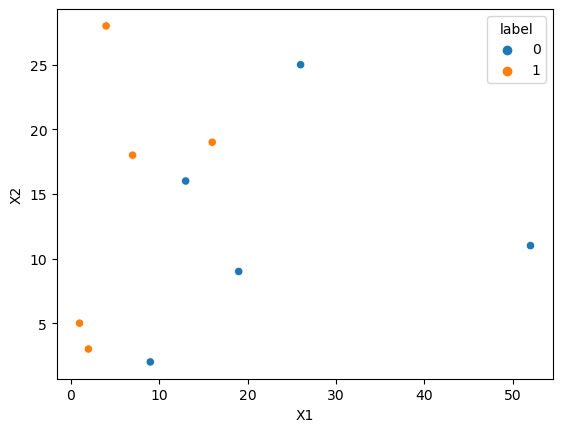

In [5]:
import seaborn as sns
sns.scatterplot(x =df['X1'],y = df['X2'],hue =df['label'])


In [6]:
df['weights'] = 1/df.shape[0]

In [7]:
df.head(1)

,X1,X2,label,weights
0,1,5,1,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()

In [9]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values


In [10]:
dt1.fit(X,y)

DecisionTreeClassifier()

[Text(0.3333333333333333, 0.875, 'x[0] <= 8.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.625, 'x[1] <= 17.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 22.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

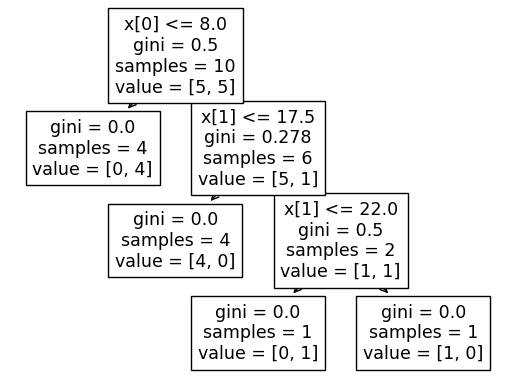

In [11]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

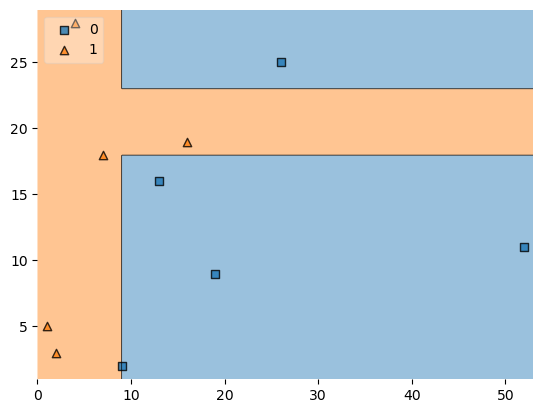

In [12]:
plot_decision_regions(X,y,clf =dt1,legend =2)

In [13]:
df['y_pred'] = dt1.predict(X)

In [14]:
def model_weight(error):
    return 0.5 *np.log((1-error)/(error +0.000000001))


In [15]:
a1 =model_weight(0)
a1

10.361632918473205

In [16]:
#update weights:
def up_weights(row,alpha = 0.1):
        if row['label'] == row['y_pred']:
            return row['weights']*np.exp(-alpha)
        else:
            return row['weights']*np.exp(alpha)
            

In [17]:
df['up_weights'] = df.apply(up_weights,axis =1)

In [18]:
df['up_weights'].sum()


0.9048374180359596

In [19]:
df['nomalized_weights'] = df['up_weights']/df['up_weights'].sum()

In [20]:
df['nomalized_weights'].sum()

0.9999999999999999

In [21]:
df['cumsum_upper']= np.cumsum(df['nomalized_weights'])


In [22]:
df['cumsum_lower'] = df['cumsum_upper']-df['nomalized_weights']

In [23]:
df[['X1','X2','label','weights','y_pred','up_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,up_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.090484,0.0,0.1
1,2,3,1,0.1,1,0.090484,0.1,0.2
2,13,16,0,0.1,0,0.090484,0.2,0.3
3,4,28,1,0.1,1,0.090484,0.3,0.4
4,52,11,0,0.1,0,0.090484,0.4,0.5
5,16,19,1,0.1,1,0.090484,0.5,0.6
6,26,25,0,0.1,0,0.090484,0.6,0.7
7,7,18,1,0.1,1,0.090484,0.7,0.8
8,19,9,0,0.1,0,0.090484,0.8,0.9
9,9,2,0,0.1,0,0.090484,0.9,1.0


In [24]:
def new_data(df):
    indices = []
    for i in range(df.shape[0]):
        a =np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a and a>row['cumsum_lower']:
                indices.append(index)
    return indices

In [25]:
index_values = new_data(df)
index_values

[7, 2, 5, 6, 8, 1, 8, 0, 5, 1]

In [26]:
df2  = df.iloc[index_values,[0,1,2,3]]

In [27]:
df2.head()

,X1,X2,label,weights
7,7,18,1,0.1
2,13,16,0,0.1
5,16,19,1,0.1
6,26,25,0,0.1
8,19,9,0,0.1


In [28]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [38]:
X = df2.iloc[:,:2].values
y = df2.iloc[:,2].values


In [39]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 17.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

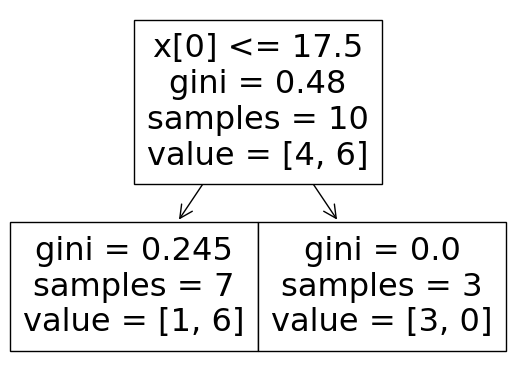

In [40]:
plot_tree(dt2)


In [43]:
df2['up_weights'] = df2.apply(up_weights,axis =1)

In [62]:
df2['up_weights'].sum()


0.9248707680399284

In [47]:
df2['nomalized_weights'] = df2['up_weights']/df2['up_weights'].sum()

In [48]:
df2['nomalized_weights'].sum()

1.0

In [49]:
df2['cumsum_upper']= np.cumsum(df2['nomalized_weights'])

In [50]:
df2['cumsum_lower'] = df2['cumsum_upper']-df2['nomalized_weights']

In [51]:
df2[['X1','X2','label','weights','y_pred','up_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,up_weights,cumsum_lower,cumsum_upper
7,7,18,1,0.1,1,0.090484,0.000000,0.097834
2,13,16,0,0.1,1,0.110517,0.097834,0.217329
5,16,19,1,0.1,1,0.090484,0.217329,0.315162
6,26,25,0,0.1,0,0.090484,0.315162,0.412996
8,19,9,0,0.1,0,0.090484,0.412996,0.510830
1,2,3,1,0.1,1,0.090484,0.510830,0.608664
8,19,9,0,0.1,0,0.090484,0.608664,0.706498
0,1,5,1,0.1,1,0.090484,0.706498,0.804332
5,16,19,1,0.1,1,0.090484,0.804332,0.902166
1,2,3,1,0.1,1,0.090484,0.902166,1.000000


In [52]:
index_values = new_data(df2)
index_values

[1, 0, 5, 1, 0, 8, 5, 5, 8, 6]

In [53]:
df3  = df3.iloc[index_values,[0,1,2,3]]

In [54]:
df3

,X1,X2,label,weights
5,16,19,1,0.1
0,1,5,1,0.1
2,13,16,0,0.1
5,16,19,1,0.1
0,1,5,1,0.1
1,2,3,1,0.1
2,13,16,0,0.1
2,13,16,0,0.1
1,2,3,1,0.1
5,16,19,1,0.1


In [55]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [56]:
X = df3.iloc[:,:2].values
y = df3.iloc[:,2].values


In [57]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 10.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]')]

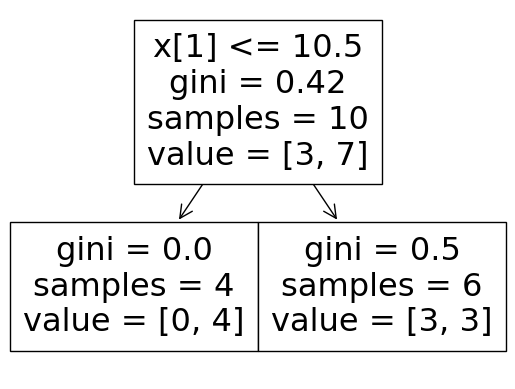

In [58]:
plot_tree(dt3)

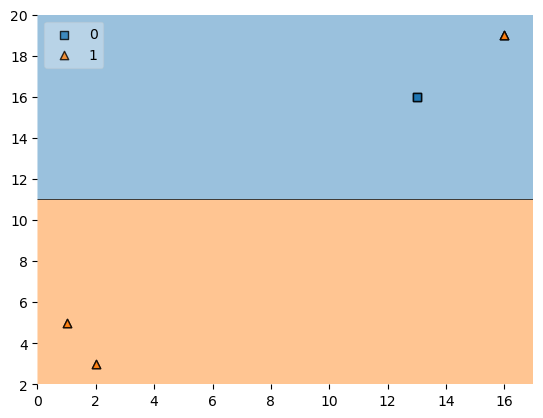

In [59]:
plot_decision_regions(X,y,clf =dt3,legend=2)
df3['y_pred'] = dt3.predict(X)

In [61]:
df3['up_weights'] = df3.apply(up_weights,axis =1)

In [63]:
df3['up_weights'].sum()

0.9649374680478661

In [64]:
df3['nomalized_weights'] = df3['up_weights']/df3['up_weights'].sum()

In [66]:
df3['nomalized_weights'].sum()

1.0

In [67]:
df3['cumsum_upper']= np.cumsum(df3['nomalized_weights'])

In [68]:
df3['cumsum_lower'] = df3['cumsum_upper']-df3['nomalized_weights']

In [69]:
df3[['X1','X2','label','weights','y_pred','up_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,up_weights,cumsum_lower,cumsum_upper
5,16,19,1,0.1,0,0.110517,0.000000,0.114533
0,1,5,1,0.1,1,0.090484,0.114533,0.208305
2,13,16,0,0.1,0,0.090484,0.208305,0.302076
5,16,19,1,0.1,0,0.110517,0.302076,0.416609
0,1,5,1,0.1,1,0.090484,0.416609,0.510381
1,2,3,1,0.1,1,0.090484,0.510381,0.604152
2,13,16,0,0.1,0,0.090484,0.604152,0.697924
2,13,16,0,0.1,0,0.090484,0.697924,0.791695
1,2,3,1,0.1,1,0.090484,0.791695,0.885467
5,16,19,1,0.1,0,0.110517,0.885467,1.000000


In [70]:
index_values = new_data(df3)
index_values

[2, 2, 5, 2, 5, 5, 2, 0, 0, 2]